In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [ ]:
df = pd.read_clipboard(sep=',')
df = df.dropna()
df.to_csv('../data/hotel_reviews.csv')

In [98]:
df = pd.read_csv('../data/hotel_reviews.csv').drop('Unnamed: 0', axis=1)

In [99]:
df.head()

,review_body,review_date
0,Stayed for 7 nights with our 3 year old son. D...,02-Aug-18
1,We stayed in the Ali tower and had a very nice...,27-May-18
2,"Awesome place, attentive and friendly staff, s...",02-Aug-18
3,Had made a reservation in December to celebrat...,02-Aug-18
4,We arrived at the hotel at about 4:30pm local ...,02-Aug-18


In [100]:
df.dtypes

review_body    object
review_date    object
dtype: object

In [101]:
df = df.astype({'review_date': 'datetime64[ns]'})

In [102]:
df.isnull().sum()

review_body    0
review_date    0
dtype: int64

In [103]:
df_group_date = df.groupby('review_date').count().reset_index(drop=False)
df_group_date = df_group_date.rename(columns={'review_body':'review_counts'})

df_group_date.head()

,review_date,review_counts
0,2002-03-21,1
1,2002-08-02,1
2,2002-09-08,1
3,2002-10-18,1
4,2002-11-11,1


In [104]:
df_group_date.dtypes

review_date      datetime64[ns]
review_counts             int64
dtype: object

In [11]:
#df_group_date['Week_Number'] = df_group_date['review_date'].dt.strftime('%U')

In [106]:
# Getting week number
df_group_date['Week_Number'] = df_group_date['review_date'].dt.week

# Getting year. Weeknum is common across years to we need to create unique index by using year and weeknum
df_group_date['Year'] = df_group_date['review_date'].dt.year

# Grouping based on required values
df_group_date_2 = df_group_date.groupby(['Year','Week_Number']).sum()
 


In [107]:
df_group_date.dtypes

review_date      datetime64[ns]
review_counts             int64
Week_Number               int64
Year                      int64
dtype: object

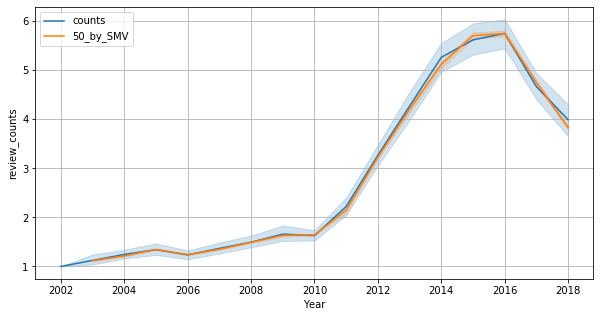

In [108]:
rolling_mean = df_group_date.review_counts.rolling(window=50).mean()

fig, ax = plt.subplots(figsize=[10,5])

sns.lineplot(df_group_date.Year, df_group_date.review_counts, label='counts')
sns.lineplot(df_group_date.Year, rolling_mean, label='50_by_SMV')
plt.grid()
plt.show()

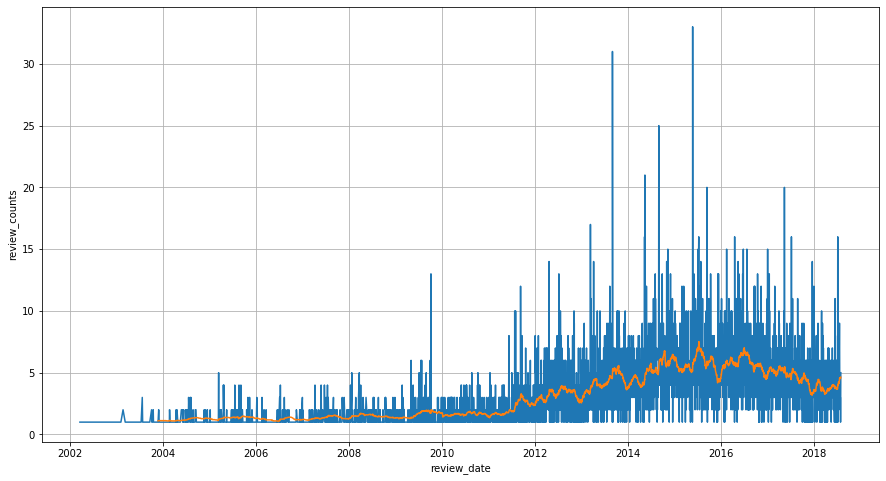

In [111]:
fig, ax = plt.subplots(figsize=[15,8])

ax =sns.lineplot(x= 'review_date', y='review_counts', data=df_group_date, estimator='mean')
ax =sns.lineplot(x= 'review_date', y=rolling_mean, data=df_group_date, estimator='mean')
plt.grid()
plt.show()

# Text Preprocessing

In [113]:
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
import nltk
nltk.download('punkt')
from collections import Counter
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abreualberto91/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abreualberto91/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abreualberto91/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
df.head()

,review_body,review_date
0,Stayed for 7 nights with our 3 year old son. D...,2018-08-02
1,We stayed in the Ali tower and had a very nice...,2018-05-27
2,"Awesome place, attentive and friendly staff, s...",2018-08-02
3,Had made a reservation in December to celebrat...,2018-08-02
4,We arrived at the hotel at about 4:30pm local ...,2018-08-02


In [115]:
reviews = df.review_body.to_list()

In [116]:
reviews[0:2]

['Stayed for 7 nights with our 3 year old son. Decor and hotel was a little old but not run down at all. Still very neat and tidy. Room was quite large. Great amount of activities and restaurants in the resort. Location a small trip away from the main area but walkable. Would definitely recommend for anyone with children.',
 'We stayed in the Ali tower and had a very nice stay. The proximity to the beach was great as was the private pool that overlooked Waikiki. The other pools were fun also. The onsight bars and restaurants weren’t bad either. I had several good drinks from around the resort. There was always something going on in the evenings which was nice.This section of Waikiki seems a little quieter on the streets and beach but it was definitely a fun place to stay.  And the beach was never crowded in front of tne hotel and lots of palm trees to sit under. The lagoon was nice but very cold ! The private check in desk was nice too. Everyone seemed nice as far as housekeeping and d

In [117]:
tokenized_doc = [word_tokenize(review.lower()) for review in reviews]

In [119]:
print(tokenized_doc[:2])

[['stayed', 'for', '7', 'nights', 'with', 'our', '3', 'year', 'old', 'son', '.', 'decor', 'and', 'hotel', 'was', 'a', 'little', 'old', 'but', 'not', 'run', 'down', 'at', 'all', '.', 'still', 'very', 'neat', 'and', 'tidy', '.', 'room', 'was', 'quite', 'large', '.', 'great', 'amount', 'of', 'activities', 'and', 'restaurants', 'in', 'the', 'resort', '.', 'location', 'a', 'small', 'trip', 'away', 'from', 'the', 'main', 'area', 'but', 'walkable', '.', 'would', 'definitely', 'recommend', 'for', 'anyone', 'with', 'children', '.'], ['we', 'stayed', 'in', 'the', 'ali', 'tower', 'and', 'had', 'a', 'very', 'nice', 'stay', '.', 'the', 'proximity', 'to', 'the', 'beach', 'was', 'great', 'as', 'was', 'the', 'private', 'pool', 'that', 'overlooked', 'waikiki', '.', 'the', 'other', 'pools', 'were', 'fun', 'also', '.', 'the', 'onsight', 'bars', 'and', 'restaurants', 'weren', '’', 't', 'bad', 'either', '.', 'i', 'had', 'several', 'good', 'drinks', 'from', 'around', 'the', 'resort', '.', 'there', 'was', 'a

In [120]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [121]:
tokenized_doc_2 = []
for lst in tokenized_doc:
    lista = []
    for word in lst:
        if (word.isalpha() == True) and (word not in stopwords.words('english')):
            lista.append(word)
            
    tokenized_doc_2.append(lista)

In [38]:
for lst in tokenized_doc_2:
    for word in lst:
         wordnet_lemmatizer.lemmatize(word)

In [39]:
print(tokenized_doc_2[0:2])

[['stayed', 'nights', 'year', 'old', 'son', 'decor', 'hotel', 'little', 'old', 'run', 'still', 'neat', 'tidy', 'room', 'quite', 'large', 'great', 'amount', 'activities', 'restaurants', 'resort', 'location', 'small', 'trip', 'away', 'main', 'area', 'walkable', 'would', 'definitely', 'recommend', 'anyone', 'children'], ['stayed', 'ali', 'tower', 'nice', 'stay', 'proximity', 'beach', 'great', 'private', 'pool', 'overlooked', 'waikiki', 'pools', 'fun', 'also', 'onsight', 'bars', 'restaurants', 'bad', 'either', 'several', 'good', 'drinks', 'around', 'resort', 'always', 'something', 'going', 'evenings', 'section', 'waikiki', 'seems', 'little', 'quieter', 'streets', 'beach', 'definitely', 'fun', 'place', 'stay', 'beach', 'never', 'crowded', 'front', 'tne', 'hotel', 'lots', 'palm', 'trees', 'sit', 'lagoon', 'nice', 'cold', 'private', 'check', 'desk', 'nice', 'everyone', 'seemed', 'nice', 'far', 'housekeeping', 'desk', 'workers', 'room', 'nice', 'heard', 'newer', 'towers', 'balcony', 'overlooke

In [40]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(tokenized_doc_2)

# Select the id for "pool": pool_id
pool_id = dictionary.token2id.get("pool")

# Use pool_id with the dictionary to print the word
print(dictionary.get(pool_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(rev) for rev in tokenized_doc]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[:4][:10])

pool
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(7, 2), (8, 2), (9, 1), (11, 1), (19, 4), (20, 1), (21, 1), (25, 1), (30, 2), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 4), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 3), (65, 1), (66, 1), (67, 4), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 6), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 2), (80, 2), (81, 1), (82, 2), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 4), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (10

In [78]:
from collections import defaultdict
import itertools

# Save the fifth document: doc
doc = corpus[5]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 10 words of the document alongside the count
for word_id, word_count in bow_doc[:10]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count



server 3
place 2
customers 2
happy 2
one 2
went 2
run 1
around 1
drinks 1
many 1


In [42]:
# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True)

In [79]:
for word_id, word_count in sorted_word_count[:20]:
    print(dictionary.get(word_id), word_count)

room 19098
hotel 15803
beach 13916
tower 12683
resort 11580
great 10639
hilton 9855
stay 8930
would 8882
one 7924
view 7830
pool 7692
get 7404
nice 7233
stayed 7110
time 6965
waikiki 6754
good 6436
us 6426
staff 6025


# Tf-Idf Model

In [84]:
from gensim.models import TfidfModel

doc = corpus[10]

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights)

[(8, 0.048746179891332043), (17, 0.1465533267821745), (30, 0.05742374476432845), (34, 0.08271419483469963), (36, 0.10281269639218202), (67, 0.1258486754717142), (68, 0.09416464182477115), (78, 0.07877253990230618), (94, 0.05168647530837744), (111, 0.11211405466374745), (127, 0.1380483023939088), (145, 0.11737530199565596), (147, 0.07092621609730326), (169, 0.07976339741063149), (202, 0.13008198211107438), (206, 0.0947871591262361), (222, 0.061374862397484534), (225, 0.12608986395397792), (368, 0.13713067736687426), (377, 0.15778066483603798), (553, 0.5915731501819488), (554, 0.25687969775768427), (555, 0.3074563508513491), (556, 0.3087502717385103), (557, 0.16194242906899795), (558, 0.23352044448110723), (559, 0.16627123503271785), (560, 0.1456007627693342), (561, 0.14043361281235603), (562, 0.14373837566144138)]


In [85]:
# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:10]:
    print(dictionary.get(term_id), weight)

appositive 0.5915731501819488
lift 0.3087502717385103
become 0.3074563508513491
basic 0.25687969775768427
note 0.23352044448110723
options 0.16627123503271785
lovely 0.16194242906899795
available 0.15778066483603798
quite 0.1465533267821745
overall 0.1456007627693342


### Getting all the text from the reviews into a single string to perform a WordCloud

In [7]:
string = []
for t in df.review_body:
    string.append(t)
string = pd.Series(string).str.cat(sep=' ')

- Remoce numerical char

In [14]:
string = re.sub("[^a-zA-Z]", " ", string)

- Remove accented characters and normalise using the unicodedata library

In [19]:
import unicodedata

string = unicodedata.normalize('NFKD', string).encode('ascii', 'ignore').decode('utf-8', 'ignore')

- Convert all text to lowercase

In [22]:
string = string.lower()

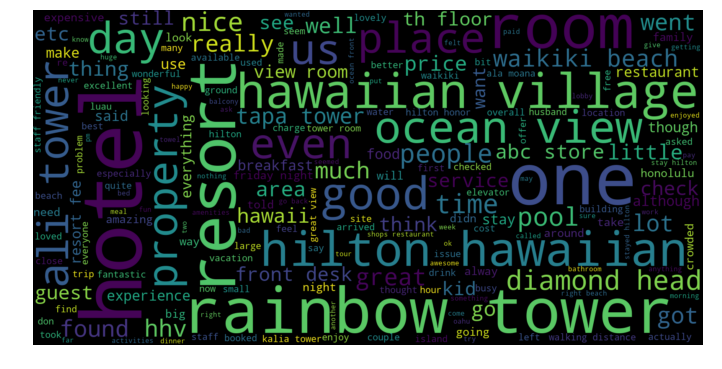

In [27]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color='black').generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()